In [1]:
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from scipy.optimize import curve_fit

In [104]:
file = open("nahuelito_press-rate.dat")

data_ra = []
data_raMu = []
data_pr = []
data_ti = []

for line in file:
    tmp = line.rstrip('\n').split(' ')
    
    tmp2 = datetime.strptime(tmp[0]+" "+tmp[1], "%Y-%m-%d %H:%M")
    data_ti.append( tmp2 )
    data_pr.append( float(tmp[2]) )
    data_ra.append( float(tmp[3]) )
    data_raMu.append( float(tmp[4]) )
    
    
data_ti = np.array(data_ti)
data_pr = np.array(data_pr)
data_ra = np.array(data_ra)
data_raMu = np.array(data_raMu)

data_raMu /= 9.65 # Nahuelito's total effective area
data_ra /= 9.65

In [118]:
i_prom = np.mean(data_ra)
p_prom = np.mean(data_pr)

deltaI = (data_ra - i_prom) / i_prom
deltaP = data_pr - p_prom

i_promM = np.mean(data_raMu)
deltaM = (data_raMu - i_promM) / i_promM

def linear(x, a):
    return a*x

pars, cov = curve_fit(linear, deltaP, deltaI, p0 = [0.])
parsM, covM = curve_fit(linear, deltaP, deltaM, p0 = [0.])

print("===========================")
print("Beta =", pars[0]*-100,"%")
print("===========================")

deltaIc = deltaI - deltaP*pars[0]
i_corr = i_prom * ( 1 + deltaIc )

deltaMc = deltaM - deltaP*parsM[0]
i_corrM = i_promM * ( 1 + deltaMc )

Beta = 0.3734915399507586 %


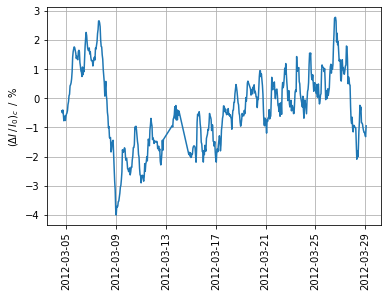

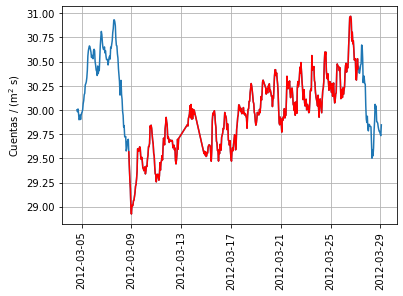

In [119]:
a = 950
b = 1500

plt.plot(data_ti[a:b], deltaMc[a:b]*100)

#plt.xlim(data_ti[a], data_ti[b])

plt.ylabel("$(\Delta I\,/\,I_0)_{c}\,\,\,/\,\,\,\%$")
plt.xticks(rotation=90)

plt.grid()
plt.show()

plt.plot(data_ti[a:b], i_corrM[a:b])
plt.plot(data_ti[a+100:b-45], i_corrM[a+100:b-45], 'r')

plt.ylabel("Cuentas / (m$^2$ s)")
plt.xticks(rotation=90)

plt.grid()
plt.show()

In [130]:
def expon(x, a1, a2, a3):
    return a1 + a1*np.exp(x*a2)

def pol2(x, a1, a2, a3):
    return a3*x*x + a2*x + a1

def poto(x, a1, a2, a3):
    return a1 + a2*x**(a3)

In [132]:
a = 950
b = 1500

limi = a+100
lims = b-45

xtime = np.array([i for i in range(lims-limi)], float)

parsEx, covEx = curve_fit(expon, xtime, i_corrM[limi:lims], p0 = [0., 0., 0.])
parspl2, covpl2 = curve_fit(pol2, xtime, i_corrM[limi:lims], p0 = [0., 0., 0])
parsPo, covPo = curve_fit(poto, xtime, i_corrM[limi:lims], p0 = [0., 0.2, 0.2])

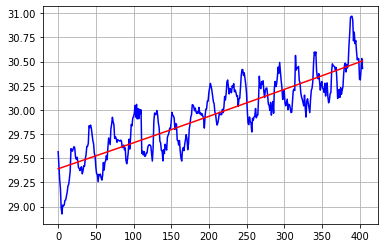

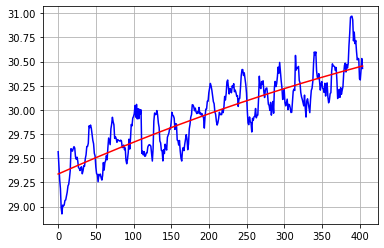

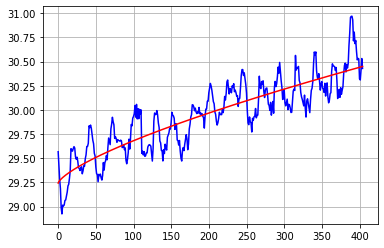

In [133]:
plt.plot(xtime, i_corrM[limi:lims], 'b')
plt.plot(expon(xtime, parsEx[0], parsEx[1], parsEx[2]), 'r')

plt.grid()
plt.show()

plt.plot(xtime, i_corrM[limi:lims], 'b')
plt.plot(pol2(xtime, parspl2[0], parspl2[1], parspl2[2]),'r')

plt.grid()
plt.show()

plt.plot(xtime, i_corrM[limi:lims], 'b')
plt.plot(poto(xtime, parsPo[0], parsPo[1], parsPo[2]), 'r')

plt.grid()
plt.show()

In [135]:
a = 950
b = 1500

limi = a+100
lims = b-45

print(data_ti[a])

xtime = np.array([i for i in range(lims-limi)], float)

parsEx, covEx = curve_fit(expon, xtime, i_corr[limi:lims], p0 = [0., 0., 0.])
parspl2, covpl2 = curve_fit(pol2, xtime, i_corr[limi:lims], p0 = [0., 0., 0])
parsPo, covPo = curve_fit(poto, xtime, i_corr[limi:lims], p0 = [0., 0.2, 0.2])

2012-03-04 15:00:00


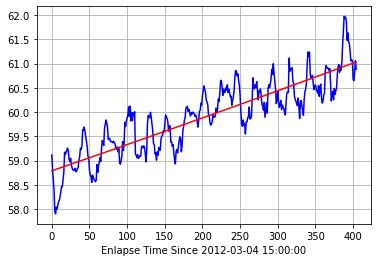

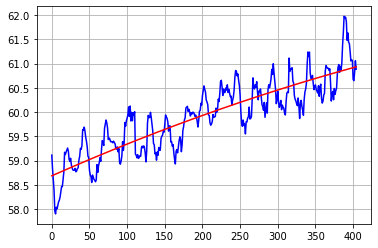

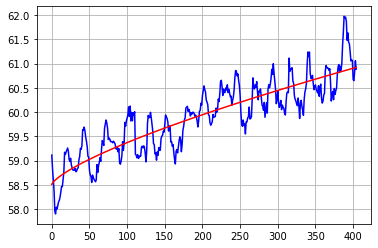

In [136]:
plt.plot(xtime, i_corr[limi:lims], 'b')
plt.plot(expon(xtime, parsEx[0], parsEx[1], parsEx[2]), 'r')

plt.xlabel("Enlapse Time Since 2012-03-04 15:00:00")

plt.grid()
plt.show()

plt.plot(xtime, i_corr[limi:lims], 'b')
plt.plot(pol2(xtime, parspl2[0], parspl2[1], parspl2[2]),'r')

plt.grid()
plt.show()

plt.plot(xtime, i_corr[limi:lims], 'b')
plt.plot(poto(xtime, parsPo[0], parsPo[1], parsPo[2]), 'r')

plt.grid()
plt.show()